In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# PART-A

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO
57 61 57 57 58 57 61 54 68
51 49 64 50 48 65 52 56 46
54 49 50 47 55 55 54 42 51
56 55 54 51 60 62 43 55 56
61 52 69 64 46 54
Use this data for answering following questions where relevant.


In [79]:

Age=[57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54]
df=pd.Series(Age)


# Q1. Compute the mean, median and the mode of the data

In [80]:

#MEAN
print("The mean of the given set of Ages is: ", np.mean(Age))
#MEDIAN
print("The median of the given set of Ages is: ", np.median(Age))

print("The mode of the given set of Ages is: ", df.mode()[0])

The mean of the given set of Ages is:  54.904761904761905
The median of the given set of Ages is:  55.0
The mode of the given set of Ages is:  54


# Q2. Compute the range , variance and standard deviation of CEO ages

In [81]:
#Range
print("The Range of the given set of Ages is: ",np.ptp(Age))
#np.max(Age)-np.min(Age)
#Variance
print("The Variance of the given set of Ages is: ",np.var(Age))
#Standard Deviation
print("The StandardDeviation of the given set of Ages is: ",np.std(Age))

The Range of the given set of Ages is:  27
The Variance of the given set of Ages is:  38.51473922902495
The StandardDeviation of the given set of Ages is:  6.2060244302633025


# Q3. Find the mean deviation for the data . The mean deviation is defined as below
(∑|X-X̄|)/n

In [82]:
print("The Mean Deviation of the set of Ages is: ",sum(abs(Age-np.mean(Age)))/len(Age))

The Mean Deviation of the set of Ages is:  4.814058956916099


# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data
[A measure to determine the skewness of a distribution is called the Pearson coefficient of skewness. The formula is
 3(X̄-MD)/s
where MD is Median and s is StandardDeviation.
 
 
The value of the coefficient if skewness usually ranges from –3 to 3. When the distribution is symmetric, 
 the coefficient is zero; when the distribution is positively skewed , the coefficient is positive, 
 \and when the distribution is negatively skewed the coefficient is negative.]

In [83]:
pearson_coeff_skewness=3*(np.mean(Age)-np.median(Age))/np.std(Age)
pearson_coeff_skewness

-0.046038214790295746

#Inference:
We can see that the value of Pearson coefficient of Skewness is: -0.046038214790295746,which is a negative value.
Hence,the distribution is negatively skewed.

# Q5. Count the number of data values that fall within two standard deviations of the mean.
Compare this with the answer from Chebyshev’s Theorem.

In [84]:
lower_limit=np.mean(df)-2*(np.std(df))
upper_limit=np.mean(df)+2*(np.std(df))
data_val=df[(df>lower_limit) & (df<upper_limit)]
print("The number of data values that fall within two standard deviations of the mean: ",len(data_val))

The number of data values that fall within two standard deviations of the mean:  39


Chebyshev’s Theorem states that that at least 1-(1/k**2) of the data falls within k standard deviations from the mean. 
* For k=2, at least 1-(1/2**2)=3/4=75% of the data should fall within two standard deviations of the mean.
  And from the above we can see that almost 39 datapoints lie between two standard deviation which is more than 
  75% of the whole datapoints.

# Q6. Find the three quartiles and the interquartile range (IQR).

In [85]:
q1=df.quantile(0.25)
q2=df.quantile(0.50)
q3=df.quantile(0.75)
iqr=q3-q1
print('The first quartile is: ',q1)
print('The Second quartile is: ',q2)
print('The Third quartile is: ',q3)
print("The Interquartile range is: ",iqr)

The first quartile is:  51.0
The Second quartile is:  55.0
The Third quartile is:  57.75
The Interquartile range is:  6.75


# Q7. Are there any outliers in the data set ?

In [86]:
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df[(df<ll)|(df>ul)]

8     68
38    69
dtype: int64

Yes,there are outliers in the dataset.

# Q8. Draw a boxplot of the dataset to confirm.

<Axes: >

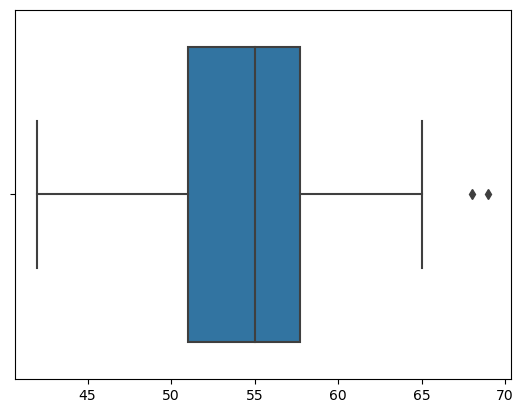

In [87]:
sns.boxplot(x=df)

We can see that there are two outliers in the dataset of Age

# Q9. Find the percentile rank of the datapoint 50.

The percentile rank of a data point is a measure indicating the percentage of scores in a dataset that are equal 
to or below that particular data point. In other words, it represents the relative standing of a value within a dataset.
A higher percentile rank indicates that the data point is higher in the distribution.

In [88]:
datapoint=50
percentile_rank = stats.percentileofscore(df, datapoint)
print("The percentile rank of the datapoint 50 is: ",percentile_rank)

The percentile rank of the datapoint 50 is:  22.61904761904762


# Q10. What is the probability that a person becoming a CEO is below 50 years of age ?

In [89]:
mu=50
xbar=np.mean(Age)
sigma=np.std(Age)
z=(xbar-mu)/sigma

print("The probability that a person becoming a CEO being below 50 years of age is: ",stats.norm.cdf(z))

The probability that a person becoming a CEO being below 50 years of age is:  0.7853303297173414


# Q11. Create a frequency distribution for the data and visualize it appropriately 

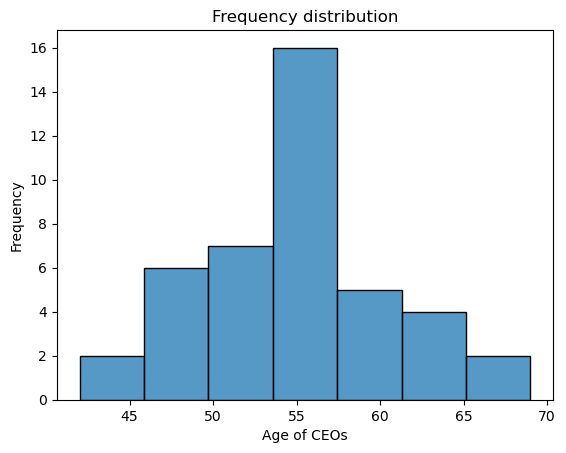

In [90]:
sns.histplot(Age)
plt.title("Frequency distribution")
plt.xlabel("Age of CEOs")
plt.ylabel("Frequency")
plt.show()

# Q12. Create a probability distribution of the data and visualize it appropriately.

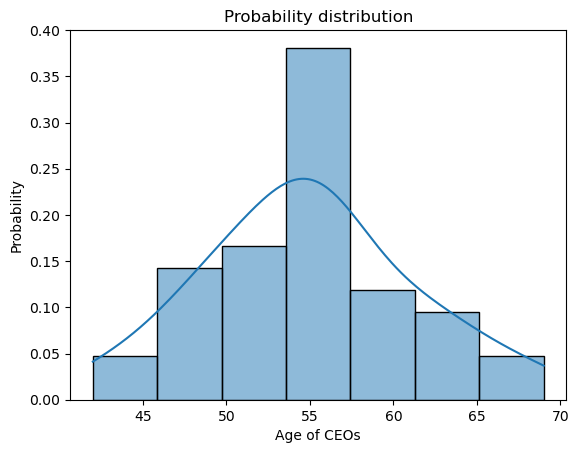

In [91]:
sns.histplot(Age,kde=True,stat='probability')
plt.title("Probability distribution")
plt.xlabel("Age of CEOs")
plt.ylabel("Probability")
plt.show()

# Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of CEOs. 
Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. 
Does it corroborate the Central Limit Theorem?

Text(0, 0.5, 'Probability_density')

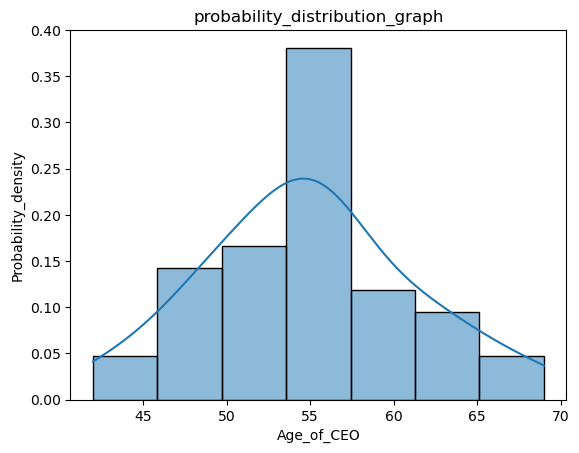

In [92]:
#Distribution graph
sns.histplot(Age,kde=True,stat='probability')
plt.title('probability_distribution_graph')
plt.xlabel('Age_of_CEO')
plt.ylabel("Probability_density")

The distribution of above dataset is slightly right skewed.

In [93]:
def sampling_distribution(dataset,sample_size,num_samples):
    sample_means=[]
    for i in range(num_samples):
        sample=np.random.choice(dataset,size=sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

<Axes: ylabel='Count'>

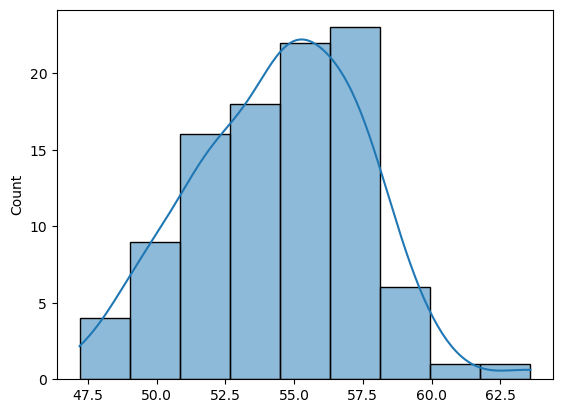

In [94]:
sns.histplot(sampling_distribution(Age,5,100),kde=True)

In [95]:
np.random.seed(70)
sample_mean=sampling_distribution(Age,5,100)
stats.skew(sample_mean)

-0.17433218109257226

In [96]:
# sampling distributions of sample size 10, 15, 20, 25, 30.

In [97]:
sample_sizes=[10,15,20,25,30]
sample_distributions={}
for sample_size in sample_sizes:
    sample_distributions[sample_size]=sampling_distribution(Age,sample_size,100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness of distribution with sample size 10 is -0.1789161426560612


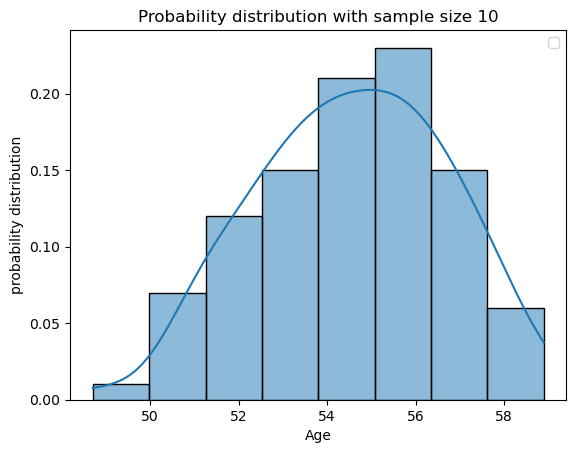

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness of distribution with sample size 15 is 0.10956480281291771


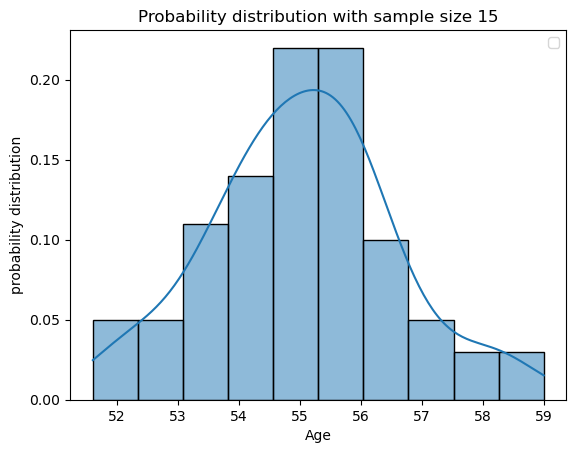

skewness of distribution with sample size 20 is -0.2693746022391867

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


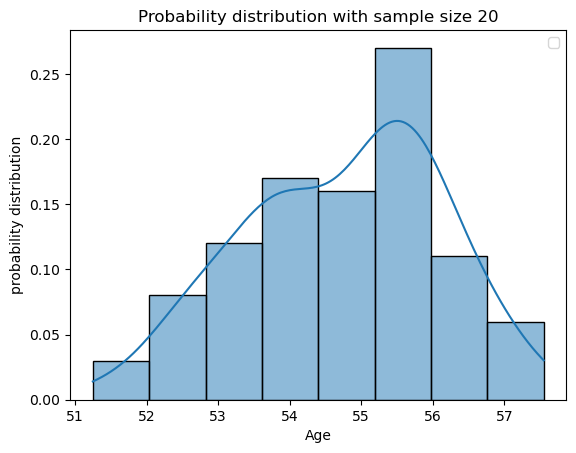

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness of distribution with sample size 25 is -0.2629230100771187


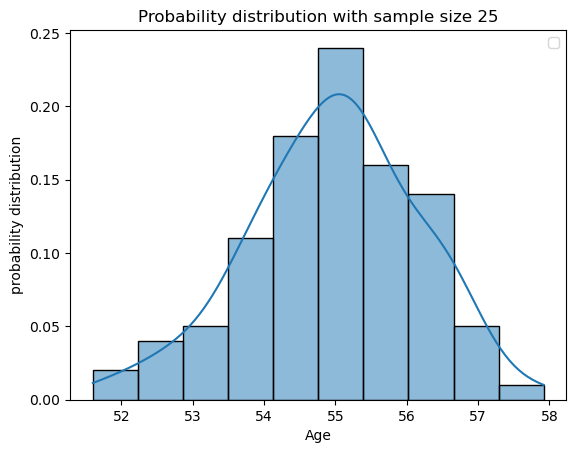

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


skewness of distribution with sample size 30 is -0.5220129356928721


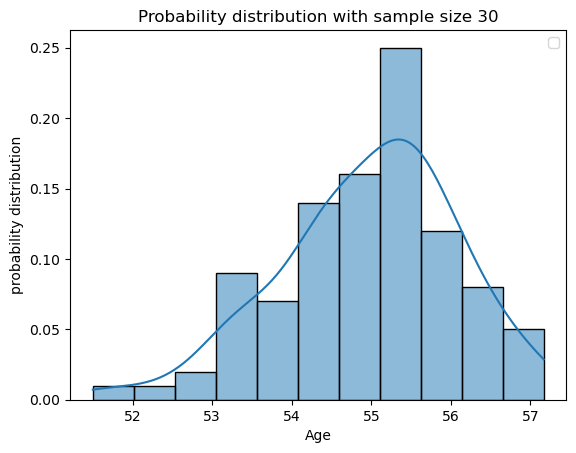

In [98]:
#Plot of smaller sample_sizes
for sample_size in sample_sizes:
    sns.histplot(sample_distributions[sample_size],kde=True,stat='probability')
    plt.title(f"Probability distribution with sample size {sample_size}")
    plt.xlabel("Age")
    plt.ylabel("probability distribution")
    print(f"skewness of distribution with sample size {sample_size} is {stats.skew(sample_distributions[sample_size])}")
    plt.legend()
    plt.show()

* Def of Central Limit theorem:
* The Central Limit Theorem (CLT) is a fundamental concept in probability and statistics. It states that, under certain 
  conditions, the distribution of the sum (or average) of a large number of independent, 
  identically distributed random variables approaches a normal (Gaussian) distribution, regardless of the original 
  distribution of the variables.

* Observations:
* 1.As the sample size is increasing the skewness of the distribution is decreasing.
* 2.For the Larger datasets,the datasets are turning towards guassian distribution.
* 3.Out of all sample sizes {10,15,20,25,30},skewness is least when sample size is 30.
* Hence,it corroborate the Central Limit Theorem.

# Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age.What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years ofage?

In [99]:
df[df>50].count()

32

In [100]:
# p(becoming CEO at age above 50)=
p=32/42
x=6
n=10
P=stats.binom.pmf(x,n,p)
P

0.13201590604140495

* There is 13% chances that out of a random sample of 10CEOs exactly 6 are above 50 years of Age.

# Q15. A study claims that 25% of all Fortune 500 companies becoming a CEO are above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.
* [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [101]:
p=0.25  #probability of a CEO above 60 years of Age
q=1-p
n=300
x=75
if n*p>=5 and n*q>=5:
    mean=n*p
    std=(n*p*q)**0.5
    Z=(x-mean)/std
    probability = stats.norm.cdf(Z + 0.5) - stats.norm.cdf(Z - 0.5)
    print(f"The probability that exactly 75 out of 300 CEOs are above 50 years of age is: {probability}")
else:
    print("The normal approximation conditions (np >= 5 and nq >= 5) are not satisfied.")

The probability that exactly 75 out of 300 CEOs are above 50 years of age is: 0.38292492254802624


# Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [102]:
alpha=0.05
n=len(Age)
x_bar=np.mean(Age)
sigma=np.std(Age,ddof=1)
degrees_of_freedom=len(Age)-1
confidence_interval=stats.t.interval(1-alpha,df=degrees_of_freedom,loc=x_bar,scale=sigma/np.sqrt(n))
print("The confidence interval for tthe true mean age of the population of CEOs is: ",confidence_interval)

The confidence interval for tthe true mean age of the population of CEOs is:  (52.94738608388915, 56.86213772563466)


* We are using t-distribution rather than z-distribution because :
* 1.The Standard deviation of the sample is unknown.
* 2.The sample size is very small.

# Q17. A data scientist wants to estimate with 95% confidence the proportion of CEOs of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [103]:
alpha=0.05
p=0.25 #proportion of CEOs above 60
ME=0.02
z=stats.norm.isf(alpha/2)
# n=?
num=(z**2)*(p*(1-p))
den=ME**2
n=num/den
n

1800.683822200372

In [104]:
print("The minimum sample size necessary to estimate the proportion of CEOs above 60 years with 95% CI is: ",round(n))

The minimum sample size necessary to estimate the proportion of CEOs above 60 years with 95% CI is:  1801


# Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident 4 and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [105]:
alpha=0.10
ME=0.05
p=0.25 #assumed proportion from recent study
z=stats.norm.isf(alpha/2)
# n=?
num=(z**2)*(p*(1-p))
den=ME**2
n=num/den
n

202.91575905715607

In [106]:
print("The minimum sample size necessary to estimate the proportion of CEOs above 60 years with 90% CI is: ",round(n))

The minimum sample size necessary to estimate the proportion of CEOs above 60 years with 90% CI is:  203


# Q19. A researcher claims that currently 25% of all CEOS are above 60 years . Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only 10 are above 60 years.

In [107]:
p=10/30  #sample proportion
p0=0.25  #Hypothesized proportion
alpha=0.05



* H0:The proportion p=0.25
* H1:The proportion p!=0.25

In [108]:
n=len(Age)
num=p-p0
den=np.sqrt(p0*(1-p0)/n)
z_stats=num/den
z_critical=stats.norm.isf(alpha/2)
print("The test statistics: ",z_stats)
print("The critical value: ",z_critical)

The test statistics:  1.2472191289246468
The critical value:  1.9599639845400545


 Since,test statistics is less than critical value.
 We Fail to reject the Null Hypothesis.
Hence,The claim of the researcher is True.

# Q20. Assume you are a data scientist for the Fortune 500 companies. You are asked to research the question whether the 
CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America 
and UK and the data is as follows:
* UK
    47 49 73 50 65 70 49 47 40 43
    46 35 38 40 47 39 49 37 37 36
    40 37 31 48 48 45 52 38 38 36
    44 40 48 45 45 36 39 44 52 47
* USA
    47 57 52 47 48 56 56 52 50 40
    46 43 44 51 36 42 49 49 40 43
    39 39 22 41 45 46 39 32 36 32
    32 32 37 33 44 49 44 44 49 32


In [109]:
UK_age=np.array([47,49,73,50,65,70,49,47,40,43,
46,35,38,40,47,39,49,37,37,36,
40,37,31,48,48,45,52,38,38,36,
44,40,48,45,45,36,39,44,52,47])
USA_age=np.array([47,57,52,47,48,56,56,52,50,40,
46,43,44,51,36,42,49,49,40,43,
39,39,22,41,45,46,39,32,36,32,
32,32,37,33,44,49,44,44,49,32])

# * a. What are your hypotheses?

# b. What significance level will you use?

# c. What statistical test will you use?

# d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [110]:
#Using inbuilt function
stats.ttest_ind(UK_age,USA_age,alternative='greater')

Ttest_indResult(statistic=1.0018742016808726, pvalue=0.15975117819260404)

In [111]:
#Manual Method
alpha=0.05
s1=8.8
s2=7.8
x1_bar=np.mean(UK_age)
x2_bar=np.mean(USA_age)
n1=len(UK_age)
n2=len(UK_age)
num=(x1_bar-x2_bar)
den=np.sqrt((s1**2/n1+s2**2/n2))
t_stats=num/den
t_stats

1.0084435261263631

In [112]:
print("The value of test statistics is: ",t_stats)

The value of test statistics is:  1.0084435261263631


In [113]:
p_value=stats.t.sf(t_stats,df=n1+n2-2)
print("The p_value : ",p_value)

The p_value :  0.1581798768709364


# e. What is your decision?

Since, the probability of Null Hypothesis being true (p_value) is greater than 0.05.
We fail to reject the Null Hypothesis.
The average age of CEO of UK is less than or equal to the average age of CEO of USA.

# f. What can you conclude?

We conclude that the average age of CEO of UK is less than or equal to the average age of CEO of USA.

# g. Do you feel that using the data given really answers the original question asked?

This sample is result specific.But for any broader generalization we need more diverse sample with more information like their
domains,company size and other economic conditions for better generalization.

# h. What other data might be used to answer the question?

To answer the question more comprehensively, you might want to consider collecting additional data, including:

* CEO ages from a more diverse set of companies.
* Information on industries, as different industries might have different trends.
* Data on economic conditions or company performance metrics that could influence CEO ages.
* A larger sample size to increase the reliability of the conclusio